In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/lib/pymodules/python2.7/matplotlib/__init__.py:758: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now '/home/ngaravito/.config'/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


$\dfrac{d^2 r }{d t^2} = - \dfrac{GMr}{(r^2 + a^2)^{3/2}}$

In [44]:
h=0.01
min_t = 0.0
max_t = 260.0
n_points = int((max_t-min_t)/h)
t = zeros(n_points)
x_1 = zeros(n_points)
x_2 = zeros(n_points)

In [45]:
def func_prime_1(t, x_1, x_2):
    return x_2

def func_prime_2(t, x_1, x_2):
    a = 1.
    return -x_1 / (x_1**2 + a**2)**(3/2.0)

In [46]:
t[0] = min_t
x_1[0] = 2.5
x_2[0] = 0.0

t[1] = min_t + h
x_1[1] = x_1[0] + h*func_prime_1(t[0],x_1[0], x_2[0])
x_2[1] = x_2[0] + h*func_prime_2(t[0],x_1[0], x_2[0])

for i in range(2,n_points):
    #get the first derivatives
    x_prime_1 = func_prime_1(t[i-1], x_1[i-1], x_2[i-1])
    x_prime_2 = func_prime_2(t[i-1], x_1[i-1], x_2[i-1])
    

    t[i] = t[i-1] + h
    x_1[i] = x_1[i-2] + 2 * h * func_prime_1(t[i-1], x_1[i-1], x_2[i-1])
    x_2[i] = x_2[i-2] + 2 * h * func_prime_2(t[i-1], x_1[i-1], x_2[i-1])

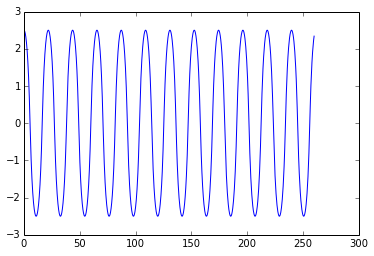

In [47]:
plot(t, x_1)